In [7]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np


In [16]:
df = dd.read_csv('C:\\Users\\pupil\\Downloads\\test_24h\\20230511_170231-ROI_8-*\\data.csv', sep=';', skiprows=1, 
                 assume_missing=True)  



In [17]:
def euclid(df):
    return np.sqrt((df['centroid_x'] - df['centroid_x'].shift(1))**2 + 
                   (df['centroid_y'] - df['centroid_y'].shift(1))**2
                  )

df['distance'] = df.map_partitions(euclid)


In [18]:

#df['mot_dist'] = np.sqrt((df['centroid_x'] - df['centroid_x'].shift(1))**2 + (df['centroid_y'] - df['centroid_y'].shift(1))**2)
#df['mot_dist'] = df['mot_dist'].fillna(0)

avg_min = df.groupby(['ID']).mean()
avg_min = df.groupby(['minute']).mean()

avg_min = avg_min.compute()
avg_min
#avg_min

,ID,timeStamp,hour,RT,isDay,temp_avg,temp_med,temp_max,centroid_x,centroid_y,distance
minute,,,,,,,,,,,
0.0,181697.5,49242.183310,0.0,21.562868,0.0,26.082973,26.082973,27.888577,47.845040,55.959172,1.046731
1.0,182203.0,49302.133813,0.0,21.552635,0.0,26.454005,26.454005,28.298665,38.634346,53.337176,1.270883
2.0,182710.0,49362.145633,0.0,21.510916,0.0,26.596251,26.596251,28.324816,22.314831,29.875304,0.523128
3.0,183218.5,49422.142488,0.0,21.514720,0.0,26.466692,26.466692,28.399960,28.863216,46.055753,0.762313
4.0,183723.0,49482.103448,0.0,21.528714,0.0,26.296542,26.296542,28.260739,29.266977,53.224393,1.184673
...,...,...,...,...,...,...,...,...,...,...,...
1435.0,179181.5,48942.245869,23.0,21.529205,0.0,26.906024,26.906024,28.824969,20.203752,88.136312,0.289349
1436.0,179687.0,49002.166347,23.0,21.496629,0.0,26.814190,26.814190,28.754654,22.161018,81.416105,0.726427
1437.0,180189.5,49062.087033,23.0,21.491560,0.0,26.304722,26.304722,28.290399,47.136538,64.716523,1.878797


<IPython.core.display.Javascript object>


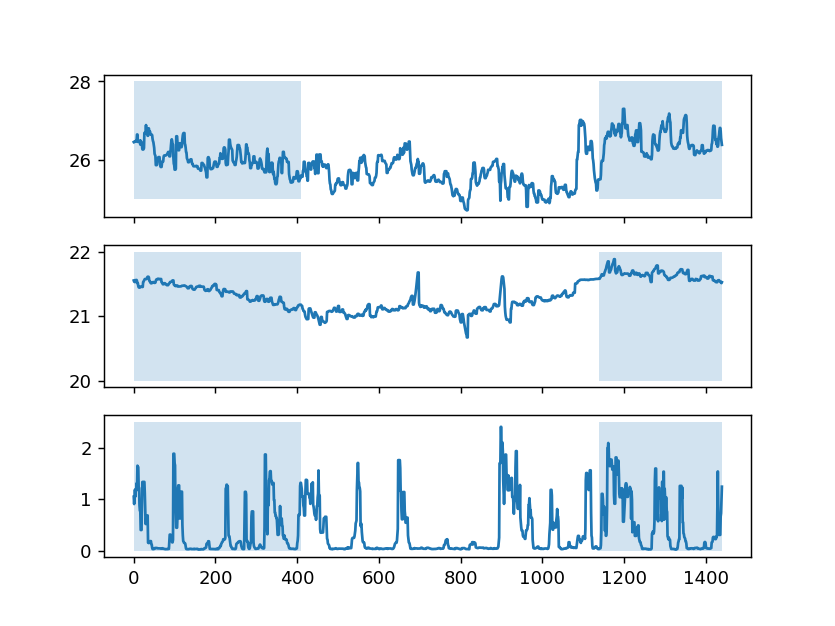

In [19]:

%matplotlib notebook

fig,ax = plt.subplots(3,1,sharex=True)

avg_min[['temp_avg','RT','distance']] = avg_min[['temp_avg','RT','distance']].rolling(5,center=True,min_periods=1).median()
ax[0].plot(avg_min.index,avg_min['temp_avg'])
ax[0].fill_between(avg_min.index,y1=25,y2=28, where=avg_min['isDay']<0.5,alpha=.2)

ax[1].plot(avg_min.index,avg_min['RT'])
ax[1].fill_between(avg_min.index,y1=20,y2=22, where=avg_min['isDay']<0.5,alpha=.2)

ax[2].plot(avg_min.index,avg_min['distance'])
ax[2].fill_between(avg_min.index,y1=0,y2=2.5, where=avg_min['isDay']<0.5,alpha=.2)


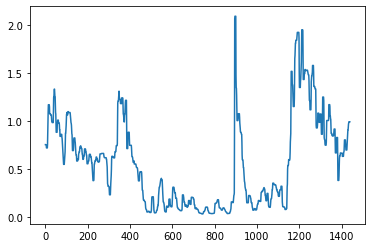

In [90]:

plt.plot(avg_min.index,avg_min['distance'])





In [29]:
a = df.head()
a

,ID,Date,timeStamp,hour,minute,RT,isDay,temp_avg,temp_med,temp_max,centroid_x,centroid_y,mot_dist
0,1.0,2023-05-11 18:00:00,27610.547513,18.0,1080.0,21.518791,1.0,26.557704,26.557704,28.581446,40.642601,37.073159,0.000000
1,2.0,2023-05-11 18:00:00,27610.771466,18.0,1080.0,21.519199,1.0,26.571749,26.571749,28.608881,40.631302,37.097113,0.026485
2,3.0,2023-05-11 18:00:00,27610.902399,18.0,1080.0,21.513154,1.0,26.566259,26.566259,28.595444,40.655628,37.090686,0.025161
3,4.0,2023-05-11 18:00:00,27611.034012,18.0,1080.0,21.516176,1.0,26.560682,26.560682,28.591405,40.631080,37.098128,0.025651
4,5.0,2023-05-11 18:00:00,27611.152734,18.0,1080.0,21.512663,1.0,26.559301,26.559301,28.576416,40.630618,37.096871,0.001339
